In [2]:
import pandas as pd
import os
import ast

from scipy.stats import spearmanr, kendalltau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib as mpl

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')

# Use LaTeX-style font rendering
mpl.rcParams.update({
    "text.usetex": True, 
    "font.family": "serif", 
    "font.serif": ["Computer Modern"],  # Change to ["Computer Modern"] if using the default LaTeX font
    "axes.labelsize": 12, 
    "axes.titlesize": 14, 
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
})

In [4]:
start_path = 'Experiment Results/Symmetrical MLP/Seeds_Batches'
files = os.listdir(start_path)

# Initialize an empty list to store DataFrames
dataframes = []
es_dfs = []

for file_ in files:
    file_path = os.path.join(start_path, file_)

    if 'OE' not in file_path:
        raw_df = pd.read_csv(file_path)
        
        # Create the 'ID' column
        raw_df['ID'] += '_' + raw_df['Seed'].astype(str) + '_' + raw_df['Batch Size'].astype(str)
        
        if 'ES' in file_path:
            # Convert the 'epoch' column from string to list
            raw_df['epoch'] = raw_df['epoch'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            # Extract the last element from the 'epoch' list
            raw_df['n_epochs'] = raw_df['epoch'].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)
        else:
            # Extract n_epochs from the filename
            n_epochs = str(file_.split('E_')[0])
            raw_df['n_epochs'] = n_epochs
        
        # Append the processed DataFrame to the list
        dataframes.append(raw_df)


# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
final_df['n_epochs'] = final_df['n_epochs'].astype('int32')
oe_df = final_df[final_df['Strategy'] == 'OE']
es_df = final_df[final_df['Strategy'] == 'ES']
final_df



,ID,n_layers,neurons_per_layer,learning_rate,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy,train_val_time,Strategy,Seed,Batch Size,n_epochs,epoch,LC_Train_Loss,LC_Train_Acc,LC_Val_Loss,LC_Val_Acc
0,1_[50]_0.001_13_1024,1,[50],0.00100,1.330482,0.540075,1.462635,0.4928,1.471116,0.4871,3.004000,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
1,1_[50]_0.0001_13_1024,1,[50],0.00010,1.588698,0.451275,1.608950,0.4404,1.604810,0.4430,3.320890,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
2,1_[50]_1e-05_13_1024,1,[50],0.00001,1.956308,0.336050,1.940590,0.3427,1.942770,0.3464,4.705431,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
3,1_[200]_0.001_13_1024,1,[200],0.00100,1.126868,0.612325,1.406803,0.5140,1.414848,0.5115,4.746408,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
4,1_[200]_0.0001_13_1024,1,[200],0.00010,1.421591,0.514175,1.481985,0.4802,1.480462,0.4858,4.827174,OE,13,1024,10,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7555,4_[200 200 200 200]_0.0001_777_512,4,[200 200 200 200],0.00010,1.129023,0.602275,1.372815,0.5196,1.369311,0.5252,28.432232,ES,777,512,67,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.069704417037964, 1.7436405181884767, 1.6257...","[0.258475, 0.3804, 0.4232, 0.45125, 0.4736, 0....","[1.8176351879119874, 1.6587655630111695, 1.594...","[0.3525, 0.4059, 0.4347, 0.4534, 0.4643, 0.476..."
7556,4_[200 200 200 200]_1e-05_777_512,4,[200 200 200 200],0.00001,1.096333,0.614900,1.381014,0.5168,1.383591,0.5171,84.210292,ES,777,512,199,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[2.291218621444702, 2.246390935897827, 2.16334...","[0.1148, 0.216725, 0.246025, 0.262925, 0.29247...","[2.274005066680908, 2.2057339767456057, 2.1121...","[0.1682, 0.242, 0.2577, 0.2839, 0.307, 0.3324,..."
7557,4_[1000 1000 1000 1000]_0.001_777_512,4,[1000 1000 1000 1000],0.00100,1.094957,0.607475,1.384056,0.5239,1.402724,0.5234,34.821422,ES,777,512,56,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.7664140811920166, 1.5200096704483033, 1.383...","[0.363075, 0.460625, 0.5088, 0.544225, 0.57575...","[1.6541541059494018, 1.5001461696624756, 1.488...","[0.4191, 0.4669, 0.4872, 0.5173, 0.5247, 0.523..."
7558,4_[1000 1000 1000 1000]_0.0001_777_512,4,[1000 1000 1000 1000],0.00010,1.104053,0.614250,1.336635,0.5370,1.346080,0.5338,35.522966,ES,777,512,57,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1.8578391366958618, 1.557549924468994, 1.4305...","[0.339775, 0.4481, 0.4964, 0.5289, 0.5579, 0.5...","[1.6361226350784301, 1.518427812576294, 1.4473...","[0.4197, 0.4631, 0.4885, 0.5044, 0.5167, 0.524..."


# Analysis

<Axes: >

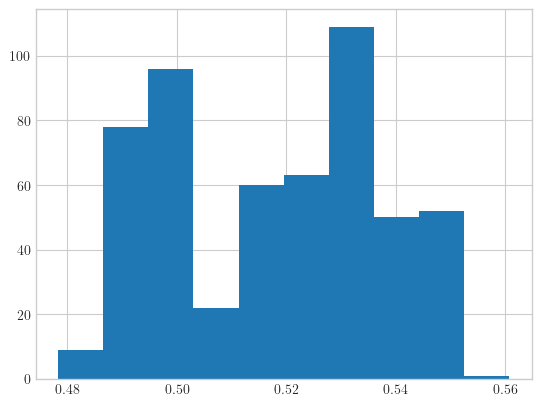

In [5]:
es_df['val_accuracy'].hist()

In [6]:
true_oe_df = oe_df[oe_df['n_epochs']==1]
# Merge both strategies

merged_df = pd.merge(left=true_oe_df, right=es_df[['ID', 'val_accuracy']], on='ID', how='inner',
                     suffixes=('_OE', '_ES')).sort_values(by='val_accuracy_OE', ascending=False)
merged_df


,ID,n_layers,neurons_per_layer,learning_rate,train_loss,train_accuracy,val_loss,val_accuracy_OE,test_loss,test_accuracy,...,Strategy,Seed,Batch Size,n_epochs,epoch,LC_Train_Loss,LC_Train_Acc,LC_Val_Loss,LC_Val_Acc,val_accuracy_ES
501,2_[1000 1000]_0.001_777_256,2,[1000 1000],0.00100,1.675272,0.406075,1.490448,0.4734,1.482870,0.4744,...,OE,777,256,1,NaN,NaN,NaN,NaN,NaN,0.5279
285,2_[1000 1000]_0.001_2024_256,2,[1000 1000],0.00100,1.673666,0.404475,1.490629,0.4728,1.501081,0.4676,...,OE,2024,256,1,NaN,NaN,NaN,NaN,NaN,0.5203
43,2_[1000 1000]_0.0001_13_128,2,[1000 1000],0.00010,1.676911,0.410925,1.509805,0.4720,1.501990,0.4702,...,OE,13,128,1,NaN,NaN,NaN,NaN,NaN,0.5430
69,2_[1000 1000]_0.001_13_256,2,[1000 1000],0.00100,1.672742,0.406150,1.507173,0.4699,1.501220,0.4660,...,OE,13,256,1,NaN,NaN,NaN,NaN,NaN,0.5253
142,1_[1000]_0.0001_1337_128,1,[1000],0.00010,1.663501,0.417925,1.520735,0.4694,1.520465,0.4710,...,OE,1337,128,1,NaN,NaN,NaN,NaN,NaN,0.5352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,4_[50 50 50 50]_1e-05_42_256,4,[50 50 50 50],0.00001,2.297740,0.101650,2.290495,0.0975,2.289485,0.1045,...,OE,42,256,1,NaN,NaN,NaN,NaN,NaN,0.4880
101,4_[50 50 50 50]_1e-05_13_512,4,[50 50 50 50],0.00001,2.301272,0.101475,2.296023,0.0946,2.295755,0.1008,...,OE,13,512,1,NaN,NaN,NaN,NaN,NaN,0.4899
20,4_[50 50 50 50]_1e-05_13_1024,4,[50 50 50 50],0.00001,2.303469,0.101475,2.300099,0.0944,2.299880,0.0999,...,OE,13,1024,1,NaN,NaN,NaN,NaN,NaN,0.4803
344,4_[50 50 50 50]_1e-05_42_1024,4,[50 50 50 50],0.00001,2.302682,0.101425,2.300951,0.0943,2.299918,0.1000,...,OE,42,1024,1,NaN,NaN,NaN,NaN,NaN,0.4807


In [7]:
def rank_architecture_results(df, metric):
    """
    Ranks them by a specified metric.
    """
    # Create a copy to avoid modifying the original DataFrame
    result_df = df.copy()

    # Sort by metric score
    result_df = result_df.sort_values(by=metric, ascending=False).reset_index(drop=True)
    
    # Add ranking
    result_df['Ranking'] = result_df.index + 1
    
    return result_df


In [8]:
ranked_merged = rank_architecture_results(merged_df, 'val_accuracy_OE')
# add bool column
ranked_merged['TOP_OE'] = ranked_merged['Ranking'] <= 100
ranked_merged['noise'] = np.random.random(size=len(ranked_merged))


In [9]:
plt.style.use('dark_background')

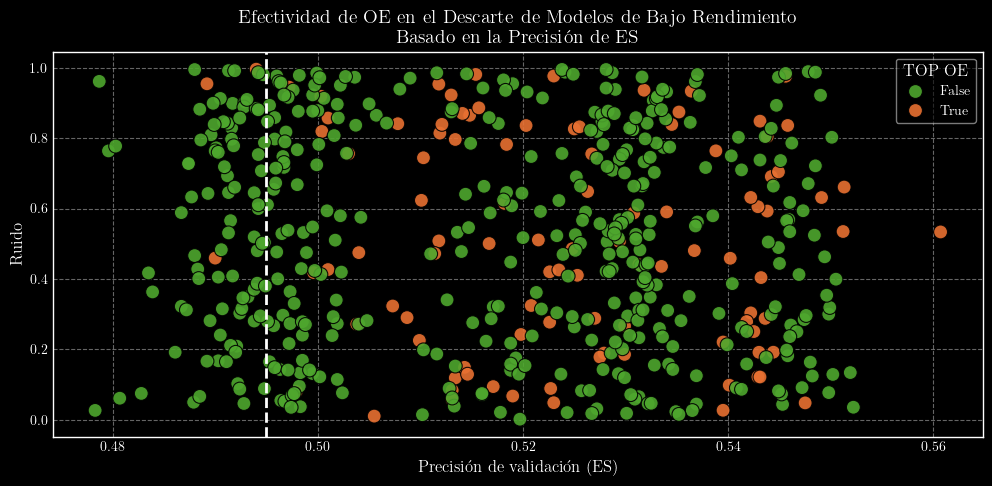

In [35]:
plt.figure(figsize=(12, 5))

# Improved scatter plot
sns.scatterplot(data=ranked_merged, x='val_accuracy_ES', y='noise', hue='TOP_OE', 
                palette={True: '#E97132', False: '#4EA72E'}, edgecolor='black', alpha=0.9, s=100)

# Improved vertical line styling
plt.axvline(0.495, color='white', linestyle='dashed', linewidth=2)

# Improved title and labels
plt.title('Efectividad de OE en el Descarte de Modelos de Bajo Rendimiento \n Basado en la Precisión de ES',
          fontsize=14, fontweight='bold')
plt.xlabel('Precisión de validación (ES)', fontsize=12)
plt.ylabel('Ruido', fontsize=12)

# Customize legend
legend = plt.legend(title='TOP OE', frameon=True, fontsize=10, title_fontsize=12)
legend.get_frame().set_facecolor('black')  
legend.get_frame().set_alpha(0.6)  

# Add subtle gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

In [10]:
ranked_merged['val_accuracy_ES'].describe()

count    540.000000
mean       0.517661
std        0.019434
min        0.478300
25%        0.498175
50%        0.520100
75%        0.532225
max        0.560700
Name: val_accuracy_ES, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_82976\2024554797.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_analysis = ranked_merged.groupby('quartile')['TOP_OE'].mean()


quartile
Q1    0.037037
Q2    0.274074
Q3    0.177778
Q4    0.251852
Name: TOP_OE, dtype: float64


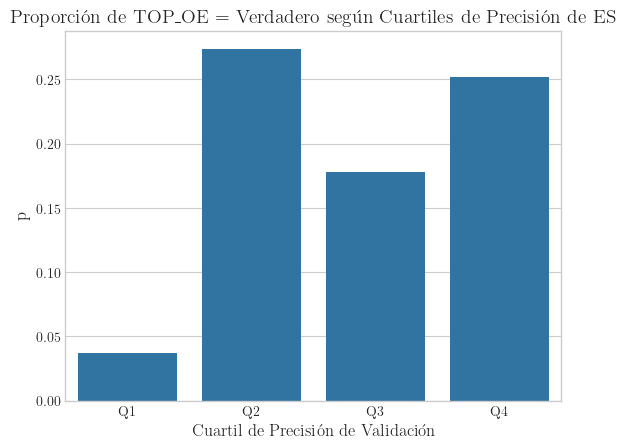

In [19]:
# Assuming you have a DataFrame 'ranked_merged' with 'val_accuracy_ES' and 'TOP_OE'
# Compute quartiles
q25 = ranked_merged['val_accuracy_ES'].quantile(0.25)
q50 = ranked_merged['val_accuracy_ES'].quantile(0.50)
q75 = ranked_merged['val_accuracy_ES'].quantile(0.75)

# Assign each point to a quartile
ranked_merged['quartile'] = pd.cut(ranked_merged['val_accuracy_ES'], bins=[float('-inf'), q25, q50, q75, float('inf')], labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Compute the percentage of 'TOP_OE = True' in each quartile
quartile_analysis = ranked_merged.groupby('quartile')['TOP_OE'].mean()

# Print results
print(quartile_analysis)

# Plot the distribution
sns.barplot(x=quartile_analysis.index, y=quartile_analysis.values)
plt.xlabel('Cuartil de Precisión de Validación')
plt.ylabel('p')
plt.title('Proporción de TOP_OE = Verdadero según Cuartiles de Precisión de ES')
plt.show()